# CS 109A/AC 209A/STAT 121A Data Science: Homework 1 (Solutions)
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Tuesday, September 13th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW1.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid running your notebook on Vocareum and avoid changing your file after submitting.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.cm as cmx
import matplotlib.colors as colors

---

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Last, First]

### Part (b): Course Number

[CS 109a or STATS 121a or AC 209a]

### Part (c): Who did you work with?

[First and Land names of students with whom you have collaborated]

---

## Problem 1: Basic Data Visualization, Manipulation and Analysis

In this problem, we will be using some basic tools of data visualization and statistical analysis to help build our intuition for finding, describing and interpreting patterns in data. We will be working with the data contained in the file `dataset_HW1.txt`. The data in `dataset_HW1.txt` contains biometric readings for a number of diabetic patients. In this problem, we will try to detect disease subtypes within this set of patients using their biometric readings.

### Part (a): Understanding a Pandas Dataframe
Load the data from `dataset_HW1.txt` into a pandas dataframe. Get a basic picture of the information contained in the dataframe by printing the head, the size of the dataframe, the range of values in numeric-valued columns. Store the max, min and range information as a pandas dataframe.

<b>Solution:</b>

In [2]:
### Since I'm visualizing a dataframe I want to put this code and it's output 
### in it's own cell.

#read data into pandas df
df = pd.read_csv('dataset_HW1.txt')

#size of data frame
print 'number of patients:', df.shape[0]

#print first 5 rows of dataframe
df.head(n=5)

number of patients: 2300


,patient_id,marker_1,marker_2,subtype,patient_age,patient_gender
0,619681,21.640523,144.001572,0,3,female
1,619711,13.787380,162.408932,0,15,female
2,619595,22.675580,130.227221,0,6,female
3,619990,13.500884,138.486428,0,17,male
4,619157,2.967811,144.105985,0,6,female


In [3]:
### Since I'm visualizing another data frame with stats I want to put the 
### code as well as the output in its own cell

#choose columns 1, 2, 3, 4 (ignoring columns 0 and 4)
df_cols_1_to_4 = df[range(1, 5)] 

#get column names from important_column dataframe
column_names = df_cols_1_to_4.columns.values 

#create pandas dataframe with column names given by column_names
stats = pd.DataFrame(columns=column_names)

#create a row called 'max' and store max values from the columns of important_columns
stats.loc['max'] = df_cols_1_to_4.max()

#create a row called 'min' and store min values from the columns of important_columns
stats.loc['min'] = df_cols_1_to_4.min()

#create a row called 'range' and store range of values from the columns of important_columns
stats.loc['range'] = df_cols_1_to_4.max() - df_cols_1_to_4.min()
stats.head(n=5)

,marker_1,marker_2,subtype,patient_age
max,80.209748,364.221777,3,90
min,-22.591722,-56.388949,0,3
range,102.801470,420.610725,3,87


### Part (b): Descriptive Statistics
Find the mean, median and standard deviation of the real-valued columns in the entire dataset. Now find the same set of descriptive statistics for each of the following subset of data:

1. children (ages 3 - 17)
2. adult males (ages 18 - 90)
3. adult females (ages 18 - 90)

Append these stats to the dataframe from part (a), containing the max, min and range. Explain what these stats say about the entire dataset as well as each of the above subsets.

Give a summary of the demographics of the patients contained in the dataset, i.e. how many children, how many adults, how many adult females and how many adult males. Display these results as pie charts.

**Solution:**

In [4]:
### Since I'm visualizing appending new stats to my dataframe with range, min and max
### I want to put the code as well as the output in its own cell

#choose columns 1, 2, 4 (ignoring columns 0, 3 and 4)
df_cols_1_2_4 = df[[1, 2, 4]] 

stats.loc['mean'] = df_cols_1_2_4.mean()
stats.loc['median'] = df_cols_1_2_4.median()
stats.loc['std'] = df_cols_1_2_4.std()
stats

,marker_1,marker_2,subtype,patient_age
max,80.209748,364.221777,3,90.000000
min,-22.591722,-56.388949,0,3.000000
range,102.801470,420.610725,3,87.000000
mean,31.970053,105.974247,NaN,38.868261
median,33.743705,105.179291,NaN,35.000000
std,18.096490,52.306201,NaN,27.211950


In [5]:
### New task new cell

#Create three different datasets by filtering our entire set
children_data = df[df['patient_age'] < 18]
adult_women_data = df[(df['patient_age'] > 17) & (df['patient_gender'] == 'female')]
adult_male_data = df[(df['patient_age'] > 17) & (df['patient_gender'] == 'male')]
    
#create dataframe with select column names (just like before)
column_names = children_data[range(1, 5)].columns.values
child_stats = pd.DataFrame(columns=column_names)

#add a row for each stat (just like before)
child_stats.loc['child_max'] = children_data[range(1, 5)].max()
child_stats.loc['child_min'] = children_data[range(1, 5)].min()
child_stats.loc['child_range'] = children_data[range(1, 5)].max() - children_data[range(1, 5)].min()

child_stats.loc['child_mean'] = children_data[[1, 2, 4]].mean()
child_stats.loc['child_median'] = children_data[[1, 2, 4]].median()
child_stats.loc['child_std'] = children_data[[1, 2, 4]].std()

child_stats

,marker_1,marker_2,subtype,patient_age
child_max,80.209748,171.429357,3,17.000000
child_min,-22.591722,70.538569,0,3.000000
child_range,102.801470,100.890788,3,14.000000
child_mean,26.267379,121.396907,NaN,10.106250
child_median,26.868357,121.799063,NaN,10.000000
child_std,24.972128,23.658433,NaN,4.307337


In [6]:
### New task new cell

#create dataframe with select column names (just like before)
column_names = adult_women_data[range(1, 5)].columns.values
adult_women_stats = pd.DataFrame(columns=column_names)

#add a row for each stat (just like before)
adult_women_stats.loc['adult_f_max'] = adult_women_data[range(1, 5)].max()
adult_women_stats.loc['adult_f_min'] = adult_women_data[range(1, 5)].min()
adult_women_stats.loc['adult_f_range'] = adult_women_data[range(1, 5)].max() - adult_women_data[range(1, 5)].min()

adult_women_stats.loc['adult_f_mean'] = adult_women_data[[1, 2, 4]].mean()
adult_women_stats.loc['adult_f_median'] = adult_women_data[[1, 2, 4]].median()
adult_women_stats.loc['adult_f_std'] = adult_women_data[[1, 2, 4]].std()
adult_women_stats

,marker_1,marker_2,subtype,patient_age
adult_f_max,59.702106,190.047718,1,90.000000
adult_f_min,28.364561,-43.386768,0,18.000000
adult_f_range,31.337545,233.434486,1,72.000000
adult_f_mean,44.053269,74.006378,NaN,54.613750
adult_f_median,43.911490,73.086403,NaN,56.000000
adult_f_std,7.141580,53.320292,NaN,21.094034


In [7]:
### New task new cell

#create dataframe with select column names (just like before)
column_names = adult_male_data[range(1, 5)].columns.values
adult_male_stats = pd.DataFrame(columns=column_names)

#add a row for each stat (just like before)
adult_male_stats.loc['adult_m_max'] = adult_male_data[range(1, 5)].max()
adult_male_stats.loc['adult_m_min'] = adult_male_data[range(1, 5)].min()
adult_male_stats.loc['adult_m_range'] = adult_male_data[range(1, 5)].max() - adult_male_data[range(1, 5)].min()

adult_male_stats.loc['adult_m_mean'] = adult_male_data[[1, 2, 4]].mean()
adult_male_stats.loc['adult_m_median'] = adult_male_data[[1, 2, 4]].median()
adult_male_stats.loc['adult_m_std'] = adult_male_data[[1, 2, 4]].std()
adult_male_stats

,marker_1,marker_2,subtype,patient_age
adult_m_max,40.458624,364.221777,2,90.000000
adult_m_min,1.860516,-56.388949,0,18.000000
adult_m_range,38.598108,420.610725,2,72.000000
adult_m_mean,24.678005,124.883059,NaN,53.744286
adult_m_median,26.168875,110.893774,NaN,54.000000
adult_m_std,6.956745,57.523807,NaN,21.295497


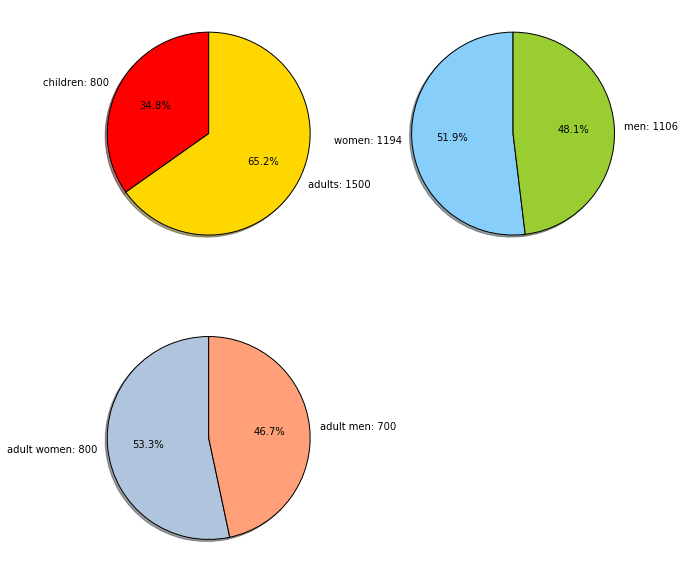

In [8]:
#children vs adults pie chart
children = children_data.shape[0] #number of kids
adults = df.shape[0] - children #adults = total number - kids

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(221)
ax1.pie([children, adults], 
        labels=['children: ' + str(children), 'adults: ' + str(adults)], 
        colors=['red', 'gold'],
        autopct='%1.1f%%', shadow=True, startangle=90)

#women vs men pie chart
women = df[df['patient_gender'] == 'female'].shape[0] #number of women
men = df.shape[0] - women #men = total number - women

ax2 = fig.add_subplot(222)
ax2.pie([women, men], 
        labels=['women: ' + str(women), 'men: ' + str(men)], 
        colors=['lightskyblue', 'yellowgreen'],
        autopct='%1.1f%%', shadow=True, startangle=90)

#adult women vs men pie chart
adult_women = adult_women_data.shape[0]
adult_men = adults - adult_women

ax3 = fig.add_subplot(223)
ax3.pie([adult_women, adult_men], 
        labels=['adult women: ' + str(adult_women), 'adult men: ' + str(adult_men)], 
        colors=['lightsteelblue', 'lightsalmon'],
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

### Part (c): Data Visualization
To understand how the biometric reading might help us determine diabetic subtypes, we begin with some visual analysis of the biometric data:

1. plot histograms of marker 1 and marker 2 (play with different values for the bin number to find the most usefule visualization)
2. plot both markers in a scatter plot, color each point according to disease subtype

Do the above for each demographics within the data: children, adult men and adult women.

**Solution:**

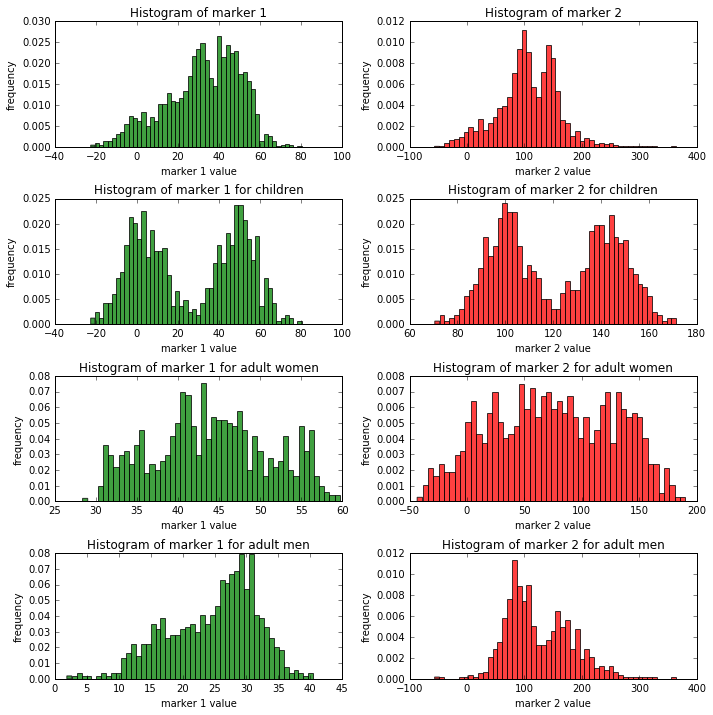

In [9]:
#function for plotting histograms
def plot_hist(data, title, x_label, face, axes):
    
    axes.hist(data, 
         50, 
         normed=1, 
         facecolor=face, 
         alpha=0.75)
    
    axes.set_title(title)
    axes.set_xlabel(x_label)
    axes.set_ylabel('frequency')
    
    return axes
    
#plot histograms for each marker and each demographics
#in the following, instead of adding one subplot to a 4x2 grid at a time
#I can get all the subplot axes for the grid in one line 
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(10, 10))
ax1 = plot_hist(df['marker_1'].values,
                'Histogram of marker 1', 
                'marker 1 value', 
                'green', 
                ax1)

ax2 = plot_hist(df['marker_2'].values,
                'Histogram of marker 2', 
                'marker 2 value', 
                'red', 
                ax2)

ax3 = plot_hist(children_data['marker_1'].values,
                'Histogram of marker 1 for children', 
                'marker 1 value', 
                'green', 
                ax3)

ax4 = plot_hist(children_data['marker_2'].values,
                'Histogram of marker 2 for children', 
                'marker 2 value', 
                'red', 
                ax4)

ax5 = plot_hist(adult_women_data['marker_1'].values,
                'Histogram of marker 1 for adult women', 
                'marker 1 value', 
                'green', 
                ax5)

ax6 = plot_hist(adult_women_data['marker_2'].values,
                'Histogram of marker 2 for adult women', 
                'marker 2 value', 
                'red', 
                ax6)

ax7 = plot_hist(adult_male_data['marker_1'].values,
                'Histogram of marker 1 for adult men', 
                'marker 1 value', 
                'green', 
                ax7)

ax8 = plot_hist(adult_male_data['marker_2'].values,
                'Histogram of marker 2 for adult men', 
                'marker 2 value', 
                'red', 
                ax8)

plt.tight_layout()
plt.show()

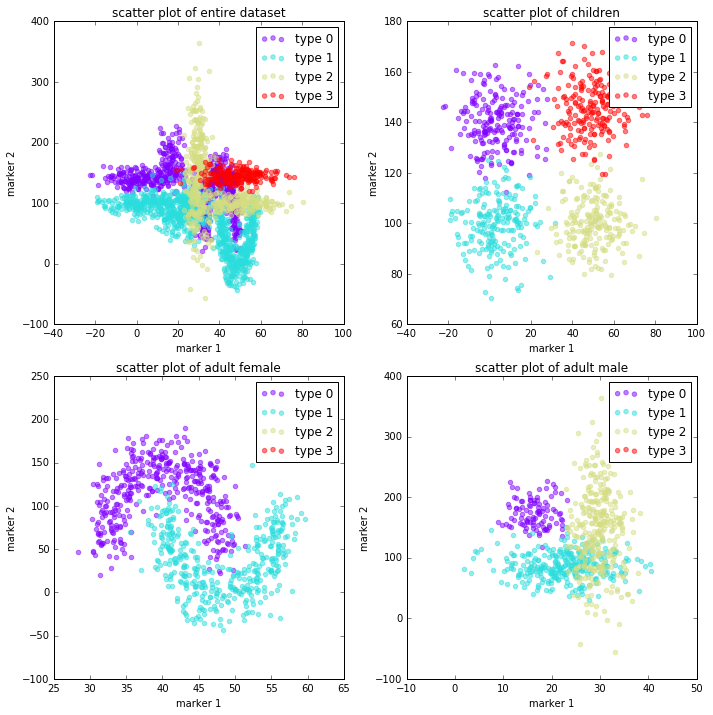

In [10]:
def plot_scatter(data, plot_title, x_lable, y_lable, groups, axes):
    #set up color map (one color per group number)
    
    #split [0, 1] in to as many parts as there are groups
    group_numbers = np.linspace(0, 1, groups) 
    #get a color map
    c_map = plt.get_cmap('rainbow') 
    #get a range of colors from color map
    c_norm  = colors.Normalize(vmin=0, vmax=group_numbers[-1])
    #get a map that maps a group number to a color
    number_map = cmx.ScalarMappable(norm=c_norm, cmap=c_map)
    
    #plot points colored by their group number
    for group in xrange(groups):
        #convert a group number into a color using our map
        color = number_map.to_rgba(group_numbers[group])
        #make a scatter plot of a specific group colored by its group number color
        axes.scatter(data[data['subtype'] == group]['marker_1'].values, 
                     data[data['subtype'] == group]['marker_2'].values, 
                     label='type ' + str(group),
                     color=color, 
                     alpha = 0.5)
    axes.legend(loc='best')
    axes.set_title(plot_title) 
    axes.set_xlabel(x_lable)
    axes.set_ylabel(y_lable)
    
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

plot_scatter(df, 'scatter plot of entire dataset', 'marker 1', 'marker 2', 4, ax1)  
plot_scatter(children_data, 
             'scatter plot of children', 
             'marker 1', 'marker 2', 
             4,
             ax2)  
plot_scatter(adult_women_data, 
             'scatter plot of adult female', 
             'marker 1', 
             'marker 2', 
             4, 
             ax3)  
plot_scatter(adult_male_data, 
             'scatter plot of adult male', 
             'marker 1', 
             'marker 2', 
             4, 
             ax4) 


plt.tight_layout()
plt.show()

### Part (d): Putting it All Together

Summarize and interpret the patterns in the **histograms** from Part (c), compare these patterns to each other. In particular, explain what these patterns indicate about the relationship between the biometric data (marker 1 and marker 2) and subtypes of diabetes amongst the patients.

Summarize and interpret the patterns in the **scatter plots** from Part (c), compare these patterns to each other. In particular, explain what these patterns indicate about the relationship between the biometric readings (marker 1 and marker 2) and subtypes of diabetes amongst the patients.

Do your analyses of the patterns in histograms and the scatter plots support or contradict each other? Is one of the two visualizations more useful than the other for anlyzing the relationship between biometric data and disease subtypes? If so which, and why?

Compare the descriptive stats you computed in part (b) with the visualizations. Which aspects of the visualizations (histogram and scatter plots) does each statistic measure? 

Do the stats support, contradict or enhance your visual analysis of the biometric data? 

Finally, what can you conclude, based on your visual analysis and stats, about the relationship between biometric data and diabetic subtypes in this pool of patients?

**Solution:**

1. **Histograms**
    a. in the histograms of (both Marker 1 and Marker 2) for the entire data set, it looks like there might be multiple modes, but it's not entirely clear that this is not due to noise.
    b. in the histograms of (both Marker 1 and Marker 2) for children, it is very clear that the distribution for Marker 1 and Marker 2 are bimodal. That is the children dataset falls into two distinct groups based on their Marker 1 biometric and two distinct groups based on their Marker 2 biometric. **Note:** It's not clear if the subgrouping by the two markers are the same or different! 
    c. in the histograms of (both Marker 1 and Marker 2) for adult women, the distributions looks unimodal
    d. in the histogram of Marker 1 for adult men, the distribution looks unimodal; the histogram of Marker 2 for adult men looks bimodal

2. **Scatter Plots**
    a. It appears that while the over all dataset has four disease subtypes, all four are present only in children. There are only two subtypes present for adult women and three for adult men.
    b. In the scatter plot (color code by disease subtype) for the entire dataset, there doesn't seem to be clear separation between the data points in the different subtypes.
    c. In the scatter plot for the children dataset, the points in the different subtypes are well separated. Points for each subtypes form spherical clusters and are concentrated around a "center".
    d. In the scatter plot for the adult female dataset, the points in the different subtypes form clusters, the clusters are separated, but are in crescent shapes.
    e. In the scatter plot for the adult male dataset, the points in the different subtypes form clusters. Two of the clusters overlap.
    
3. **Comparison of Visualizations and Stats**
    a. The modes in the histogram correspond to clustering of the biometric data by disease subtype. 
    b. Using the histogram alone, we cannot necessarily deduce the distribution of the scatter plots.
    c. Using the histograms alone, we cannot deduce clustering by disease subtypes. The modes in the histogram tell us where the data is concentrated along which axis, but they cannot tell us which disease subtypes exist in each mode.
    d. The stats we calculated for the entire dataset also give no indication of the patterns we see in the scatter plots.

4. **Conclusion**
    a. if we looked at the data one demographic group at a time, then, for all demographic groups, it looks like biometric data cluster by disease type.
    b. the clusters are well separated for children, the separation is along both the Marker 1 and Marker 2 axes. The separation is not so clear for the other two groups.

---

## Problem 2: Introduction to Classification

In this problem, we will use your analysis of the relationship between biometric data and diabetic subtypes from Problem 1 to **classify** the disease subtype of new patients.

### Part (a): A Disease Subtype Classifier for Children

In the pool of child patients, compute the mean biometric data (marker 1 and marker 2) for each diabetic subtype. For a new patient between the ages of 3 and 18, we will classify the patient as the subtype whose biometric mean is most ``similar" to the patient's biometric data.

- Explain why this way of classifying disease subtypes of new patients is reasonable. Support your explanation with your analysis from Problem 1.

To evaluate our classifier, we can use it to classify a set of new patients whose disease subtype we already know. We measure the quality of our classifier by compute the percentage of new patients whose disease subtype we correctly classify. 

- Explain why the percentage of correct classification is a reasonable way to evaluate our classifier. What might be some shortcomings or ambiguities of this method of evaluation (**Hint:** think about the effect of the number of patients in each disease subtype, confidence level etc).

**Solution:**

In Problem 1 part (d), we observed that, for children, the data breaks into four natural clusters by disease subtype (evident in the scatter plots). For each disease subtype, the data tend to cluster densely around a "central" value for marker 1 and marker 2. From the shape of the clusters and the way the data is distributed in each cluster (see scatter plot), we can visually deduce that the x, y-coordinates of each cluster "center" is just the mean of mark 1 and marker 2 values, respectively. Thus, it is reasonable to expect that if a patient has disease subtype $n$, then his/her biometric marker values will be close to those of the mean (i.e. center) of cluster $n$. 

From the scatter plots, we can also see that the clusters representing the four disease subtypes are clearly separated. For example, a point belong to cluster 0 is closer in distance to points in cluster 0 than points in any other clusters. Thus, it is reasonable to expect that the biometric values of a patient with disease subtype $n$ will be most simlar to the those of disease subtype $n$.

Combining the above, we see that it's reasonable to classify a new patient as subtype $n$, if his/her biometric data is most similar to the center of cluster $n$. Here, it is clear that when we say two biometric readings, $d_1$ and $d_2$, are close, we mean that their distance in the $x,y$-plane is small. That is, the similarity of $d_2$ and $d_2$ is measured by their Euclidean distance:

$$
d_1 = (marker^{d_1}_1, marker^{d_1}_2)\\
d_2 = (marker^{d_2}_1, marker^{d_2}_2)\\
\text{Similarity}(d_1, d_2) = \sqrt{\left(marker^{d_1}_1 - marker^{d_2}_1\right)^2 + \left(marker^{d_1}_2 - marker^{d_2}_2\right)^2}
$$

**Note:** if a cluster center $c$ is closest in terms of Euclidean distance to a data point $d$, then it is also the closest center in terms of the Euclidean distance squared. That is, when computing the distance between each data point and the cluster centers, we may omit computing the square root:

$$
\text{Similarity}(d_1, d_2) = \left(marker^{d_1}_1 - marker^{d_2}_1\right)^2 + \left(marker^{d_1}_2 - marker^{d_2}_2\right)^2
$$

### Part (b): Implementation

- __Randomly__ split the child patient data into two sets: training (70%) and testing (30%). 

- Implement the scheme for classifying disease subtypes described in Part (a). That is, write a function, `classify`, that takes as input the training data and testing data (representing new patients), which then:

    1. computes the biometric means for subtypes using the training data 
    2. classifies the disease subtype of each new patient by comparing their biometric data to the means you've computed (i.e. compute the Euclidean distance between a new patient's biometric data and the biometric means of each disease subtype, classify the new patient as the subtype whose means is most similar in term of the Euclidean distance)


- Write a function, `evaluate`, that takes as input the actual disease subtypes for a set of patients as well as the predicted disease subtypes and computes the percentage of new patients who are correctly classified.

- Use the `classify` function to classify the disease subtypes of your testing data. Then use the `evaluate` function to evaluate your classification.

**Solution:**

To compute the mean of each disease subtype, we can do this in one of two ways:

- split the children datset into groups based on disease subtypes, by filtering (as we have done in Problem 1)

```python
type_0 = children_data[children_data['subtype'] == 0]
mean_0 = type_0[['marker_1', 'marker_2']].mean()

type_1 = children_data[children_data['subtype'] == 1]
mean_1 = type_1[['marker_1', 'marker_2']].mean()

type_2 = children_data[children_data['subtype'] == 2]
mean_2 = type_2[['marker_1', 'marker_2']].mean()

type_3 = children_data[children_data['subtype'] == 3]
mean_3 = type_3[['marker_1', 'marker_2']].mean()
```
 
- use the ``groupby`` function to group the dataframe into subgroups based on disease subtype and then compute the mean. To use ``groupby``:

```python
#creates an object that is your dataframe grouped by the values
#in the 'subtype' column
children_grouped = children_data.groupby('subtype') 

#creates a data frame with the means of each column
#for each subtype
mean_df = children_grouped.mean()

```

Now, to compare the biometric readings of each test patient to the cluster means, we have to subtract the corresponding markers, square them and sum them etc. We can do this in one of two ways:

- iterating through each test patient in the list. We can do this by first finding the length of the database and then, using a for loop, iterate through each row in the database:
```python
for i in len(test.index):
      #do something with test.iloc[i]
``` 
A cleaner way to iterate through rows is via the ``iterrows()`` function. This function returns a "list" of row indices and the rows themselves:
```python
for index, row in df.iterrows():
      #do something with the row index, "index"
      #do something with the row itself, "row"
```

- getting an entire column in a dataframe and performing arithmetic on all values in the dataframe simultaneously:

```python
#create new series that is the result of subtract 5 
#from each value in the "marker_1" column
new_column = df['marker_1'] - 5
```

Finally, after comparing the $n$-th test data to the four cluster means, for example, 

|cluster 0.0 | cluster 1.0 |cluster 2.0 |cluster 3.0 
 ---|--- | --- | --- |--- 
n-th record |1.5| 0.4| 3.6| 10.0

we have to choose the cluster that is the closest to our data point. We can do this by using the ``.min(axis=1)`` function (taking minimum values along columns) and then use selection (``if-then``) to find the cluster number of the closest mean. A cleaner way to do this is to use the ``.idxmin()`` function, which gives us the label of the minimum value, rather than the minum value itself. 

For example, applying ``.idxmin(axis=1)`` to the above dataframe will give us the label ``'cluster 1.0'``, since cluster 1.0 has the smallest distance (0.4) to the $n$-th record.

**Coding tip:** Often we want to do something more complex than arithmetic to an entire ``pandas`` series (perhaps as a column in a dataframe). We can do so via the ``map`` function, which takes as input a **function** and applies this function to every value in the series. For example:

```python
my_series.map(str)
```
converts every value in the series into a string type. 

In future solutions, we'll see more functions like ``map`` and we'll discuss the principles of using such functions (called higher order functions) in depth.

In [11]:
#### Let's put our function definitions in one cell, for readability

#--------  split
#input: data (dataframe)
#output: train (dataframe), test (dataframe)

def split(data):
    #find the number of records dataframe
    length = data.shape[0]
    #build a list of integer indices for records in dataframe
    indices = range(length)
    #randomly shuffle the indices
    np.random.shuffle(indices)
    
    #take 70% of the shuffled list of indices for training
    train_indices = indices[0:int(length * .7)]
    #take the remainder the shuffled list of indices for testing
    test_indices = indices[int(length * .7):]
    
    #get the records for the training indices
    train = data.iloc[train_indices, :]
    #get the records for the testing indices
    test = data.iloc[test_indices, :]
    
    return train, test
    
#--------  classify
#input: train (dataframe), test (dataframe)
#output: predicted_subtypes (numpy array)

def classify(train, test):
    #create dataframe with just biometric and disease subtype info
    biometric_df = train[['marker_1', 'marker_2', 'subtype']]
    
    #group the records in dataframe by 'subtype' and compute mean
    mean_df = biometric_df.groupby('subtype').mean()
    
    #converts row labels like 0.0, 1.0 to string (this will save us indexing headaches)
    mean_df.index = mean_df.index.map(str)
    
    #iterate through the rows in the mean dataframe
    for index, mean in mean_df.iterrows():
        #for each cluster mean, store the distance between all test points and mean
        #in new column labeled by the cluster number
        test.loc[:, index] = ((test['marker_1'] - mean['marker_1'])**2 
                              + (test['marker_2'] - mean['marker_2'])**2)
 
    #now the dataframe "test" has four new columns: 0, 1, 2, 3
    #the n-th value in the 0 column represents the distance btw the
    #n-th data point and the 0-th cluster mean
    
    #get the columns from test that are store the distances to the cluster means
    distances = test[mean_df.index]
    
    #for each record, get the labels on the column that stores the minimum distance
    predicted_subtypes = distances.idxmin(axis=1).values
    
    #converts row labels like 0.0, 1.0 from string back to float (to make arithmetic easier)
    predicted_subtypes = predicted_subtypes.astype(float) 
    
    return predicted_subtypes

#--------  evaluate
#input: predicted_subtypes (array), true_subtypes (array)
#output: percent_correct (float)

def evaluate(predicted_subtypes, true_subtypes):
    #subtract the array of predicted subtypes and the array of true subtypes
    comparison = predicted_subtypes - true_subtypes
    
    #when the predicted value is different from the true value, that entry is non-zero
    #we set all non-zero entries (wrong predictions) to 1
    comparison[comparison != 0] = 1
    
    #the total number of wrong predictions is the sum of the array (where entries have a 1
    #for wrong and 0 for right)
    total_wrong = comparison.sum()
    
    right_percent = (len(comparison) - total_wrong) / (len(comparison) * 1.0)
    
    return right_percent

In [13]:
### Use our functions to classify test children patients and evaluate classification

train, test = split(children_data)

predicted_subtypes = classify(train, test)

right_percent = evaluate(predicted_subtypes, test['subtype'].values)

print 'percent of children correctly classified using mean:', round(right_percent * 100, 2)

percent of children correctly classified using mean: 98.75


### Part (c): Further Evaluation of Our Classifier

- Create training and testing sets from the adult female patients. Use the `classify` function from Part (b) to classify the disease subtypes of your testing data. Then use the `evaluate` function to evaluate your classification.

- Do the same for adult male patients.

- Is our method of classifying disease subtypes valid for adult male and adult female patients (use the returned values of the `evaluate` function to support your explanation)? 

- Explain why our method of classifying disease subtypes is or is not valid for adult data. 

**Solution:**

If you had written your classification and evaluation functions with sufficient generality in part (b), then you can reuse them to classify and evaluate adult data!

In [14]:
### For adult females

train, test = split(adult_women_data)

predicted_subtypes = classify(train, test)

right_percent = evaluate(predicted_subtypes, test['subtype'].values)

print 'percent of adult females correctly classified using mean:', round(right_percent * 100, 2)

percent of adult females correctly classified using mean: 80.83


To see what's going on with our classification, we make scatter plots of the true types and our predicted types.

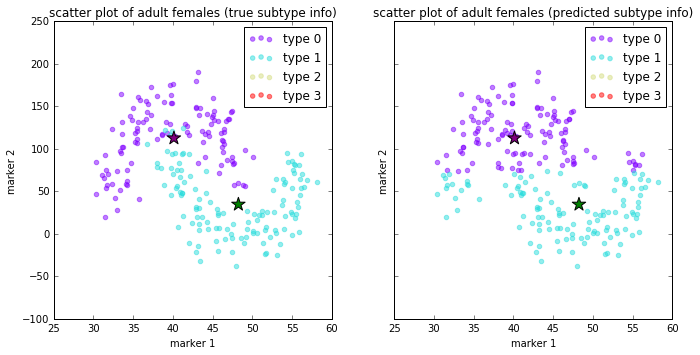

In [15]:
#make a scatter plot of the true vs predicted subtypes in the testing data 

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

#create dataframe with just biometric and disease subtype info
biometric_df = train[['marker_1', 'marker_2', 'subtype']]
    
#group the records in dataframe by 'subtype' and compute mean
mean_df = biometric_df.groupby(['subtype']).mean()

plot_scatter(test, 
             'scatter plot of adult females (true subtype info)', 
             'marker 1', 
             'marker 2', 
             4, 
             ax1) 

ax1.scatter(mean_df['marker_1'].values, mean_df['marker_2'].values, c=['purple', 'green'], s=200, marker='*')

predicted = test.copy()
predicted.loc[:, 'subtype'] = predicted_subtypes

plot_scatter(predicted, 
             'scatter plot of adult females (predicted subtype info)', 
             'marker 1', 
             'marker 2', 
             4, 
             ax2) 

ax2.scatter(mean_df['marker_1'].values, mean_df['marker_2'].values, c=['purple', 'green'], s=200, marker='*')

plt.tight_layout()
plt.show()

In [16]:
### For adult males

train, test = split(adult_male_data)
train=adult_male_data

predicted_subtypes = classify(train, test)

right_percent = evaluate(predicted_subtypes, test['subtype'].values)

print 'percent of adult males correctly classified using mean:', round(right_percent * 100, 2)

percent of adult males correctly classified using mean: 62.56


To see what's going on with our classification, we make scatter plots of the true types and our predicted types.

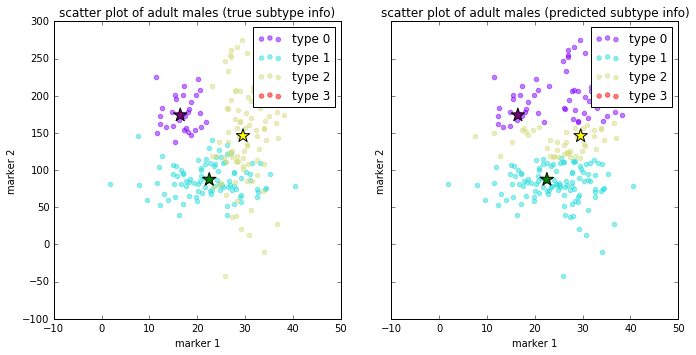

In [17]:
#make a scatter plot of the true vs predicted subtypes in the testing data 

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

#create dataframe with just biometric and disease subtype info
biometric_df = train[['marker_1', 'marker_2', 'subtype']]
    
#group the records in dataframe by 'subtype' and compute mean
mean_df = biometric_df.groupby(['subtype']).mean()

plot_scatter(test, 
             'scatter plot of adult males (true subtype info)', 
             'marker 1', 
             'marker 2', 
             4, 
             ax1) 

ax1.scatter(mean_df['marker_1'].values, mean_df['marker_2'].values, c=['purple', 'green', 'yellow'], s=200, marker='*')

predicted = test.copy()
predicted.loc[:, 'subtype'] = predicted_subtypes

plot_scatter(predicted, 
             'scatter plot of adult males (predicted subtype info)', 
             'marker 1', 
             'marker 2', 
             4, 
             ax2) 

ax2.scatter(mean_df['marker_1'].values, mean_df['marker_2'].values, c=['purple', 'green', 'yellow'], s=200, marker='*')

plt.tight_layout()
plt.show()

Clearly, using cluster means to classify adult data isn't as accurate as using them to classify children. Specifically, using cluster means to classify adult male data performs worse than using them on adult female data.

We can get a sense of why this is using the scatter plots in Problem 1 and the scatter plots right above. The scatter plot for adult females show that data clusters completely by disease subtype and the clusters are separated. But since the clusters are crescent shaped the mean of each cluster lies outside the cluster. In particular, for some points in each cluster, the mean of the opposite cluster is closer than the mean of their own cluster! These points are precisely the ones that end up misclassified.

The scatter plot for adult males show that data clusters completely by disease subtype, but two of the subtypes overlap. For the points in the overlap, you can see that they are in often closer in distance to the mean of the opposite cluster than to the mean of their own cluster.

**Conclusion:** using cluster means to classify disease subtype doesn't work well when the clusters are of odd shapes or when the clusters overlap.

## Problem 3: More Classification

In this problem, we will explore a different way to classify the disease subtype of new patients.

### Part (a): Another Classifier

In Problem 2, we classified the disease subtype of a new patient by comparing their biometric data with the biometric means of the subtypes we compute from the training data. This time, we compare the biometric data of the new patient with the data of all the patients in the training data. We identify the patient in the training data whose biometric data is most similar (in terms of Euclidean distance) to that of the new patient. Finally, we classify the disease subtype of the new patient as that of the patient most similar to them.

Explain why this way of classifying disease subtypes of new patients is reasonable. Support your explanation with your analysis from Problem 1.

**Solution:**

This is reasonable in a common sensical way: if two patients have nearly identical biometric readings, they probably have the same disease subtype (if we assume that marker1 and marker 2 are reasonable indicators of disease subtype).

### Part (b): Implementation

- __Randomly__ split the child patient data into two sets: training (70%) and testing (30%).  

- Implement the scheme for classifying disease subtypes described in Part (a). That is, write a function, `classify`, that takes as input the training data and data for new patients, which then:

    1. for each new patient, identify the patient in the training set whose biometric data is the most similar to this patient 
    2. classifies the disease subtype of each new patient as the subtype of the patient most similar to them
    

- Use the `classify` function to classify the disease subtypes of your testing data. Then use the `evaluate` function, from Problem 2, to evaluate your classification.

- Do the same for adult male and adult female data.

**Solution:**

In [26]:
#--------  classify_nn
#input: train (dataframe), test (dataframe)
#output: predicted_subtypes (numpy array)

def classify_nn(train, test):
    #create dataframe with just biometric and disease subtype info
    biometric_df = train[['marker_1', 'marker_2']]
    
    #we'll build a list of the nearest neighbour for each of our test points
    nearest_neighbours = []
    
    #iterate through the rows in the test data
    for index, test_row in test.iterrows():
        #for each test patient, store the distance between all training points and test point in an series
        distances = ((train['marker_1'] - test_row['marker_1'])**2 
                     + (train['marker_2'] - test_row['marker_2'])**2)
        
        #find the row label of the training point that is the closest to the test point
        nearest = distances.idxmin()
        
        #add the nearest neighbour for the current test point to our list
        nearest_neighbours.append(nearest)
        
    #get the disease subtype of the closest neighbour of each test point
    predicted_subtypes = train.loc[nearest_neighbours]['subtype'].values
    
    return predicted_subtypes

In [27]:
### Use our functions to classify test children patients and evaluate classification

train, test = split(children_data)

predicted_subtypes = classify_nn(train, test)

right_percent = evaluate(predicted_subtypes, test['subtype'].values)

print 'percent of children correctly classified using the nearest neighbour:', round(right_percent * 100, 2)

### For adult females

train, test = split(adult_women_data)

predicted_subtypes = classify_nn(train, test)

right_percent = evaluate(predicted_subtypes, test['subtype'].values)

print 'percent of adult females correctly classified the nearest neighbour:', round(right_percent * 100, 2)

### For adult males

train, test = split(adult_male_data)

predicted_subtypes = classify_nn(train, test)

right_percent = evaluate(predicted_subtypes, test['subtype'].values)

print 'percent of adult males correctly classified the nearest neighbour:', round(right_percent * 100, 2)

percent of children correctly classified using the nearest neighbour: 95.83
percent of adult females correctly classified the nearest neighbour: 95.42
percent of adult males correctly classified the nearest neighbour: 81.04


### Part (c): Comparison of Classifiers

Compare the performance of the classifier you implemented in Part (b) with the one from Problem 2.

Which classifier does a better job on the child patient data? Explain why, using your analysis of the dataset from Problem 1. 

Answer the above question for the adult male and adult female data.

**Solution:**

Using the nearest neighbour to classify disease subtype doesn't show a visible improvement for classifying children. However, the nearest neighbour classification shows a marked improvement in classifying adults! 

For adult men, the new scheme improves classification, but the percentage of correct classification for men still lag behind women and children. This is again intuitive from the scatter plots, the cluster in the adult male scatter plot overlap. For a point in the overlap, a nearest neighbour is just as likely to be from the opposite disease subtype as it is to be from the same disease subtype. I.e. the disease subtypes of the nearest neighbours do not form a good indicator of the disease subtype of a point. 

---

## Challenge Problem: US Voting Data (by Age and Sex)
**(Required for AC 209A Students)**

In this problem, you will perform preliminary data exploration and visualization of some real voting data. 

**Note:** You are now working with real-life data, so be cautious regarding data type, data format and data quality.

### Part (a): Downloading and Understanding the Data

Download Table 1 from the [US Census Bereau](http://www.census.gov/data/tables/time-series/demo/voting-and-registration/p20-577.html). This is an excel file (do not perform any analysis using Microsoft Excel). 

Load the data into a Python data structure.

Write a brief summary describing what information is included in this dataset (provide evidence to support your summary).

**Rough outline of possible solution:**

Inspecting the spreedsheet (always do a sanity check visual inspection when possible!) we see that the data contains voter registration and voter turn out information in the US, borken down by age and sex. We immediately see that the data, although a table, is not in the tabular format that we defined in class. A couple of problems that will make working with this data difficult:

1. the dataset is secretely three data sets: total population, male, female
2. the spreedsheet contains comments on the table as well as the table itself
3. the column labels are hierarchical, that is, multiple columns (each with its own lable) are grouped under a group label (which is contained in a merged cell)
4. the row labels hide a variable: age
5. the first column contains multiple variables: age and age group

Let's see what happens if we just read the file, as is, using ``read_excel``:

In [28]:
df = pd.read_excel('table1.xls')

df.head(n=12)

,Table with row headers in column A and column headers in rows 4 through 6.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,"Table 1. Reported Voting and Registration, by ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(In thousands),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sex and Age,Total Population,US Citizen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total Population,NaN
3,NaN,NaN,Total Citizen Population,Reported registered,NaN,Reported not registered,NaN,No response to registration 1,NaN,Reported voted,NaN,Reported did not vote,NaN,No response to voting 2,NaN,Reported registered,Reported voted
4,NaN,NaN,NaN,Number,Percent,Number,Percent,Number,Percent,Number,Percent,Number,Percent,Number,Percent,Percent,Percent
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Both sexes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,.Total 18 years and over,239874,219941,142166,64.6,41101,18.7,36675,16.7,92251,41.9,93032,42.3,34658,15.8,59.3,38.5
9,..18 to 24 years,29658,27539,11610,42.2,9390,34.1,6539,23.7,4721,17.1,16780,60.9,6037,21.9,39.1,15.9


As you can see, without some careful thought, the dataframe we get is hard to read and use.

There are many ways to resolve this (feel free to be creative, be individual and use as many tools as you like), but here are some solutions that involve relative-low levels of new technology:

1. skip the first three rows containing comments
2. add a column for age (and skip age group since we can do this grouping ourselves)
3. read the data into three dataframes or use multi-indexing ([example](http://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/))
4. flatten the column labels, i.e. turn "number" into "number citizens reported registered" or use multi-indexing ([example](http://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/))

We'll introduce multi-indexing in later solutions (feel free to explore on your own). For now, we'll go with some cumbersome but low tech solutions.

In [29]:
#read data without comments at start and end, column labels
df = pd.read_excel('table1.xls', skiprows=range(3), skip_footer=5, header=None)

#get column labels
headers = df.iloc[range(3)]

#fill missing values in column labels with the label directly above
headers.fillna(axis=1, method='ffill', inplace=True)
#fill missing values in column labels with the label on the left
headers.fillna(axis=0, method='ffill', inplace=True)
#flatten the three tiers of column labels
columns = headers.iloc[0] + ' ' + headers.iloc[1] + ' ' + headers.iloc[2]
#replace names with duplicte words
columns.iloc[0] = 'Age'
columns.iloc[1] = 'Total Population'
columns.iloc[2] = 'US Citizen Total Citizen Population'
columns

0                                                  Age
1                                     Total Population
2                  US Citizen Total Citizen Population
3                US Citizen Reported registered Number
4               US Citizen Reported registered Percent
5            US Citizen Reported not registered Number
6           US Citizen Reported not registered Percent
7      US Citizen No response to registration 1 Number
8     US Citizen No response to registration 1 Percent
9                     US Citizen Reported voted Number
10                   US Citizen Reported voted Percent
11             US Citizen Reported did not vote Number
12            US Citizen Reported did not vote Percent
13           US Citizen No response to voting 2 Number
14          US Citizen No response to voting 2 Percent
15        Total Population Reported registered Percent
16             Total Population Reported voted Percent
dtype: object

In [30]:
#find the row number where 'male', 'female' are (those mark the begining of new dataframe)
male_index = df[df[0] == 'Male'].index.tolist()[0]
female_index = df[df[0] == 'Female'].index.tolist()[0]

#break dataframe into three pieces
df_both = df.iloc[range(0, male_index)]
df_male = df.iloc[range(male_index, female_index)]
df_female = df.iloc[range(female_index, df.shape[0])]

#remove rows with NaN values
df_both = df_both.dropna()
df_male = df_male.dropna()
df_female = df_female.dropna()

#remove rows for age groups
df_female = df_female[(~df_female[0].str.contains('Total')) 
                      & (~df_female[0].str.contains('75 years and over')) 
                      & (~df_female[0].str.contains('to'))]


df_male = df_male[(~df_male[0].str.contains('Total')) 
                  & (~df_male[0].str.contains('75 years and over')) 
                  & (~df_male[0].str.contains('to'))]

df_both = df_both[(~df_both[0].str.contains('Total')) 
                  & (~df_both[0].str.contains('75 years and over')) 
                  & (~df_both[0].str.contains('to'))]

#set column names 
df_both.columns = columns
df_male.columns = columns
df_female.columns = columns

df_both.head(n=5)

,Age,Total Population,US Citizen Total Citizen Population,US Citizen Reported registered Number,US Citizen Reported registered Percent,US Citizen Reported not registered Number,US Citizen Reported not registered Percent,US Citizen No response to registration 1 Number,US Citizen No response to registration 1 Percent,US Citizen Reported voted Number,US Citizen Reported voted Percent,US Citizen Reported did not vote Number,US Citizen Reported did not vote Percent,US Citizen No response to voting 2 Number,US Citizen No response to voting 2 Percent,Total Population Reported registered Percent,Total Population Reported voted Percent
15,..18 years,3920,3719,951,25.6,1643,44.2,1124,30.2,465,12.5,2199,59.1,1054,28.4,24.3,11.9
16,..19 years,3712,3489,1204,34.5,1428,40.9,856,24.6,526,15.1,2228,63.9,734,21,32.4,14.2
17,..20 years,4262,3998,1719,43,1308,32.7,971,24.3,692,17.3,2422,60.6,884,22.1,40.3,16.2
18,..21 years,4220,3913,1699,43.4,1250,31.9,965,24.7,605,15.5,2424,61.9,884,22.6,40.3,14.3
19,..22 years,4442,4181,2015,48.2,1293,30.9,872,20.9,790,18.9,2549,61,841,20.1,45.4,17.8


### Part (b): What's the Story?

Perform data exploration and identify as well as describe the major trends in this data set. Use your computations and visualizations effecitively and specifically to support your analysis, hypothesis and conclusions. Your analysis must include relationships between age, sex and reported percentage of voter registration, reported voting.

**Rough outline of possible solution:**

There are lots of things to explore here. Demographic break down of the data by age, by sex, by citizenship, by turnout etc. Here, we're just going to show some visualizations of the relationship between age, sex and voter registration and turnout.

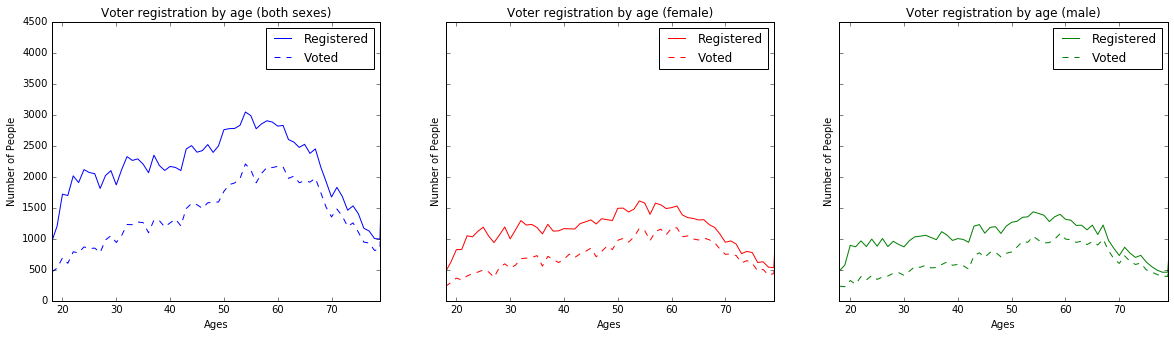

In [31]:
#by age (increment of 1 year excluding 80+)
ages = range(18, df_both.shape[0] + 18)
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

ax1.plot(ages, df_both['US Citizen Reported registered Number'].values, c='blue', label='Registered')
ax1.plot(ages, df_both['US Citizen Reported voted Number'].values, '--', c='blue', label='Voted')
ax1.set_title('Voter registration by age (both sexes)')
ax1.set_xlim([18, 79])
ax1.set_xlabel('Ages')
ax1.set_ylabel('Number of People')
ax1.legend()

ax2.plot(ages, df_female['US Citizen Reported registered Number'].values, c='red', label='Registered')
ax2.plot(ages, df_female['US Citizen Reported voted Number'].values, '--', c='red', label='Voted')
ax2.set_title('Voter registration by age (female)')
ax2.set_xlabel('Ages')
ax2.set_xlim([18, 79])
ax2.set_ylabel('Number of People')
ax2.legend()

ax3.plot(ages, df_male['US Citizen Reported registered Number'].values, c='green', label='Registered')
ax3.plot(ages, df_male['US Citizen Reported voted Number'].values, '--', c='green', label='Voted')
ax3.set_title('Voter registration by age (male)')
ax3.set_xlabel('Ages')
ax3.set_xlim([18, 79])
ax3.set_ylabel('Number of People')
ax3.legend()

plt.show()

Looks like turn out is always lower than registration for all age groups. 

It also appears that voter turn out and registration peaks around the middle ages. But this could be due to the fact that there are fewer number of older and younger voters.

It looks like there might be some differences between the sexes as well.

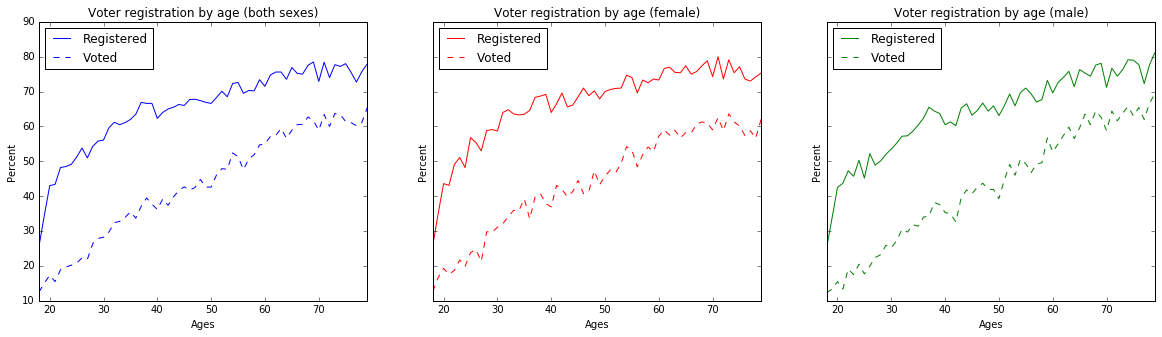

In [32]:
#by age (increment of 1 year excluding 80+)
ages = range(18, df_both.shape[0] + 18)
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

ax1.plot(ages, df_both['US Citizen Reported registered Percent'].values, c='blue', label='Registered')
ax1.plot(ages, df_both['US Citizen Reported voted Percent'].values, '--', c='blue', label='Voted')
ax1.set_title('Voter registration by age (both sexes)')
ax1.set_xlim([18, 79])
ax1.set_xlabel('Ages')
ax1.set_ylabel('Percent')
ax1.legend(loc='best')


ax2.plot(ages, df_female['US Citizen Reported registered Percent'].values, c='red', label='Registered')
ax2.plot(ages, df_female['US Citizen Reported voted Percent'].values, '--', c='red', label='Voted')
ax2.set_title('Voter registration by age (female)')
ax2.set_xlabel('Ages')
ax2.set_xlim([18, 79])
ax2.set_ylabel('Percent')
ax2.legend(loc='best')


ax3.plot(ages, df_male['US Citizen Reported registered Percent'], c='green', label='Registered')
ax3.plot(ages, df_male['US Citizen Reported voted Percent'], '--', c='green', label='Voted')
ax3.set_title('Voter registration by age (male)')
ax3.set_xlabel('Ages')
ax3.set_xlim([18, 79])
ax3.set_ylabel('Percent')
ax3.legend(loc='best')

plt.show()

Plotting the **percentage** (instead of raw numbers) of registration and turn out against age, we see that voter participation increases with age.

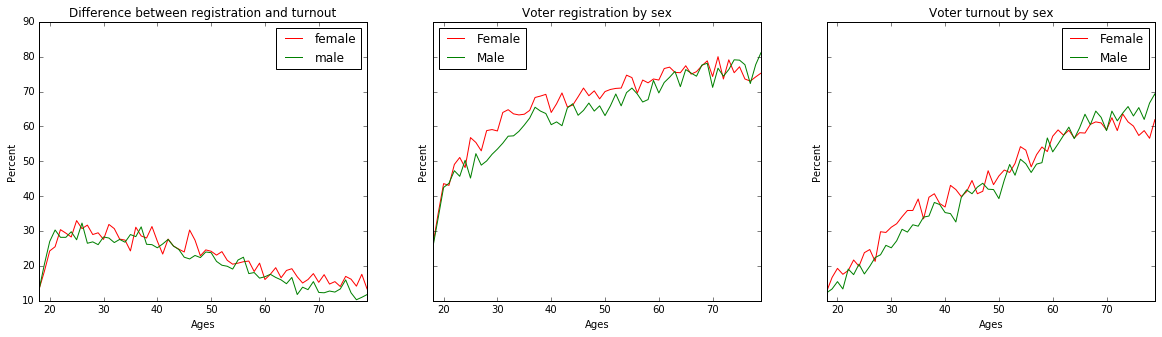

In [34]:
#by age (increment of 1 year excluding 80+)
ages = range(18, df_both.shape[0] + 18)
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

ax1.plot(ages, df_female['US Citizen Reported registered Percent'].values 
               - df_female['US Citizen Reported voted Percent'].values, 
         c='red', 
         label='female')

ax1.plot(ages, df_male['US Citizen Reported registered Percent'].values 
               - df_male['US Citizen Reported voted Percent'].values, 
         c='green', 
         label='male')
ax1.set_title('Difference between registration and turnout')
ax1.set_xlim([18, 79])
ax1.set_xlabel('Ages')
ax1.set_ylabel('Percent')
ax1.legend(loc='best')

ax2.plot(ages, df_female['US Citizen Reported registered Percent'].values, c='red', label='Female')
ax2.plot(ages, df_male['US Citizen Reported registered Percent'].values, c='green', label='Male')
ax2.set_title('Voter registration by sex')
ax2.set_xlabel('Ages')
ax2.set_xlim([18, 79])
ax2.set_ylabel('Percent')
ax2.legend(loc='best')

ax3.plot(ages, df_female['US Citizen Reported voted Percent'].values, c='red', label='Female')
ax3.plot(ages, df_male['US Citizen Reported voted Percent'].values, c='green', label='Male')
ax3.set_title('Voter turnout by sex')
ax3.set_xlabel('Ages')
ax3.set_xlim([18, 79])
ax3.set_ylabel('Percent')
ax3.legend(loc='best')

plt.show()

It appears that females in this dataset register and vote in greater percentages than males, but the drop-off between registration and turnout is greater for females than it is for males.

### Part (c): What's Next?

Based on your analysis in part (c), what types of interesting questions or tasks could you ask of or perform with this data (explain your answer)? What additional data do you anticipate needing in order to answer these questions/perform these tasks (explain your answer)?

**Rough outline of possible solution:**

There are several patterns that emerges from our briefly analysis above:

1. increase in voter participation with age
2. greater percentage of voter participation in females 
3. greater discrepancy between voter registration and turnout in females

We should take care to note that this data takes into account only people who self report, thus, it's possible that the trends in the overall population are different.

Other tables at [US Census Bereau](http://www.census.gov/data/tables/time-series/demo/voting-and-registration/p20-577.html) show other voter demographics information. It would be interest to see if the same trends can be observed  regionally or in economic or racial subgroups. 

One might try to begin building hypothese to explain these trends by finding correlations between voter participation, age, sex and a new set of variables.